## 1. Loading libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

## 2. Loading and exploring the data

In [2]:
df = pd.read_csv('C:\\Users\\marce\\1.Database\\used_cars_data.csv', index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.head()


There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


We can see there are some columns that are represented as strings but should be numeric. This includes columns like: MIliage, Engine, Power and New_Price.

In [3]:
#checking data information
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


Observation: Data types shoudl be corrected.

In [4]:
df.loc[148:148, :]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,1.28 Cr,37.0


In [5]:
#Searching for duplicated values
duplicated = df.duplicated()
sum(duplicated)

1

Observation: Number is to small to trigger further investigation.

## 3. Processing columns

In [6]:
# looking at value counts for non-numeric features

num_to_display = 10 # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Observation: Variable "Mileage" have 2 different unit measures kmpl and kmkg. Conversion factor to get all data in Kmpl depending on Fuel_type (Specific Weight) = (1 L of CNG weighs 0.714 kg) and (1 L of LPG weighs 0.51 kg)

In [7]:
df[df.Fuel_Type=='CNG'].head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40


In [8]:
#Splitting variable where space is found
Mil = df["Mileage"].str.split(" ", n = 1, expand = True)
df.drop(['Mileage'], axis=1, inplace=True)
df["Mileage_in_Kmpl"]= Mil[0]   
df["Mileage_unit"]= Mil[1]

In [9]:
#Preseting this only to double check a result later one,"Mileage_in_Kmpl", index 127
df.iloc[126:129:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage_in_Kmpl,Mileage_unit
S.No.,,,,,,,,,,,,,,
126,Mercedes-Benz New C-Class 200 K AT,Kolkata,2009,28352,Petrol,Automatic,First,1796 CC,178 bhp,5.0,NaN,9.35,11.7,kmpl
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,3.25,26.6,km/kg
128,Honda CR-V 2.4 MT,Bangalore,2007,47700,Petrol,Manual,Second,2354 CC,152 bhp,5.0,NaN,5.25,10.8,kmpl


In [10]:
#Change column type to ran formula in the next steps
df.info()
df['Mileage_in_Kmpl'] = df.Mileage_in_Kmpl.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Mileage_in_Kmpl    7251 non-null   object 
 13  Mileage_unit       7251 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries

In [11]:
#Variable Mileage conversion: Conversion factor (1 L of CNG weighs 0.714 kg)
def cng(x):
    if x > 0:
        return x * 0.714
    else:
        return x
    
# Miliage conversion to adjusted CNG
df['Mileage_Conv_cng'] = df[(df['Fuel_Type']=='CNG')]['Mileage_in_Kmpl'].apply(cng)

In [12]:
#Variable Mileage conversion: Conversion factor (1 L of LPG weighs 0.51 kg)
def lpg(x):
    if x > 0:
        return x * 0.51
    else:
        return x
    
# create sex_new 
df['Mileage_Conv_lpg'] = df[(df['Fuel_Type']=='LPG')]['Mileage_in_Kmpl'].apply(lpg)

We can see Power and Engine features with the exact same number of missing values. I hypothesys as the power is proportionaly affected by the size of the engine the data missing might be coming from the same source.

In [13]:
#Updating values converted from variables 'Mileage_Conv_cng' and 'Mileage_Conv_lpg' into variable 'Mileage_in_Kmpl'
df2 = df[['Mileage_Conv_cng']]
df2.columns =['Mileage_in_Kmpl'] 
df3 = df[['Mileage_Conv_lpg']]
df3.columns =['Mileage_in_Kmpl']

In [14]:
#Continuation, using funtion update
df.update(df2)
df.update(df3)
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage_in_Kmpl,Mileage_unit,Mileage_Conv_cng,Mileage_Conv_lpg
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,1.75,18.9924,km/kg,18.9924,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,NaN,12.50,19.6700,kmpl,NaN,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2000,kmpl,NaN,NaN


In [15]:
#Checking if update was succesfully
df2[df2['Mileage_in_Kmpl']>0].head(3)

,Mileage_in_Kmpl
S.No.,
0,18.9924
127,18.9924
328,18.7782


In [16]:
df.iloc[126:129:] #Comparison to line [123] shows successful conversion at "Mileage_in_Kmpl" variable

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage_in_Kmpl,Mileage_unit,Mileage_Conv_cng,Mileage_Conv_lpg
S.No.,,,,,,,,,,,,,,,,
126,Mercedes-Benz New C-Class 200 K AT,Kolkata,2009,28352,Petrol,Automatic,First,1796 CC,178 bhp,5.0,NaN,9.35,11.7000,kmpl,NaN,NaN
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,998 CC,58.16 bhp,5.0,NaN,3.25,18.9924,km/kg,18.9924,NaN
128,Honda CR-V 2.4 MT,Bangalore,2007,47700,Petrol,Manual,Second,2354 CC,152 bhp,5.0,NaN,5.25,10.8000,kmpl,NaN,NaN


In [17]:
#Dropping columns only used for the unit conversion of Milieage variable
df.drop(['Mileage_unit','Mileage_Conv_cng','Mileage_Conv_lpg'],axis=1, inplace=True)

In [18]:
#Removing String "CC" from variable Engine
cc = df["Engine"].str.split(" ", n = 1, expand = True)
df.drop(['Engine'], axis=1, inplace=True)
df["Engine_CC"]= cc[0]   
df["Remove"]= cc[1]
df.drop(['Remove'], axis=1, inplace=True)
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,New_Price,Price,Mileage_in_Kmpl,Engine_CC
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,NaN,1.75,18.9924,998
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,NaN,12.50,19.6700,1582
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,8.61 Lakh,4.50,18.2000,1199


In [19]:
#Removing String "bhp" from variable Power
bhp = df["Power"].str.split(" ", n = 1, expand = True)
df.drop(['Power'], axis=1, inplace=True)
df["Power_bhp"]= bhp[0]   
df["Remove_1"]= bhp[1]
df.drop(['Remove_1'], axis=1, inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_in_Kmpl,Engine_CC,Power_bhp
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,18.9924,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,19.6700,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,18.2000,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,20.7700,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,15.2000,1968,140.8


In [20]:
#Dealing with variable New_price and strings values across its entries
column_target = ["New_Price"]  

In [21]:
def Conv_CR (val):
    """This function removes values with strings ending with 'Lakh' 
    and convert values ending with "Cr" by multiplying them by 100 to 
    get all values in Lakh Unit.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(val, str):  # checks if `income_val` is a string
        multiplier = 1  
        if val.endswith('Lakh'):
            multiplier = 1
        elif val.endswith('Cr'):
            multiplier = 100
        return float(val.replace('Lakh', '').replace('Cr', '')) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

#for x in column_target:
#df[x] = df[x].apply(Conv_CR)

for x in column_target:
    df['New_Price_Lakh'] = df[x].map(Conv_CR)

In [22]:
#Dropping column New_Price
df.drop(['New_Price'],axis=1,inplace=True)

In [23]:
#I want to create a new feature "Brand" to see if I can drawn further insights
Bra = df["Name"].str.split(" ", n = 1, expand = True)
df["Brand"]= Bra[0] 
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,18.9924,998,58.16,NaN,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.6700,1582,126.2,NaN,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.2000,1199,88.7,8.61,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.7700,1248,88.76,NaN,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.2000,1968,140.8,NaN,Audi


In [24]:
# Converting object type column to category type and numerical type
df['Name'] = df['Name'].astype('string')
df['Location'] = df['Location'].astype('category')
df['Year'] = df['Year'].astype('float64')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype('float64')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Engine_CC'] = df['Engine_CC'].astype('float64')
#df['Power_bhp'] = df['Power_bhp'].astype('float64')
df['New_Price_Lakh'] = df['New_Price_Lakh'].astype('float64')
df['Seats'] = df['Seats'].astype('float64')
df['Brand'] = df['Brand'].astype('category')
#It was defined number seats as a category type.

In [25]:
#Got a problem when converted variable Power_bhp, below it was founded due one entrie is = "null"
# looking at value counts for non-numeric features

num_to_display = 20 # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df.dtypes == 'category'].index:
    val_counts = df[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Name: Brand, d

In [26]:
# Dealing with entrie "NULL" from variable "Power_bhp" to change to NaN and become type Float
df['Power_bhp'] = df['Power_bhp'].astype(object).replace('null', 'NaN').astype('float64')

In [27]:
#Function used to find some string ("Cr") at variable 'New_Price_Lakh'
#if results is -1 = not found, anything above = found 
df7 = df['New_Price_Lakh'].astype(str)
df7.dropna(inplace = True)   
# substring to be searched 
sub ='Cr'
# creating and passsing series to new column 
df["Indexes"]= df7.str.find(sub) 
df[df['Indexes']>0].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand,Indexes
S.No.,,,,,,,,,,,,,,,


In [28]:
#dropping temporary column Indexes 
df.drop(['Indexes'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   string  
 1   Location           7253 non-null   category
 2   Year               7253 non-null   float64 
 3   Kilometers_Driven  7253 non-null   float64 
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Seats              7200 non-null   float64 
 8   Price              6019 non-null   float64 
 9   Mileage_in_Kmpl    7251 non-null   float64 
 10  Engine_CC          7207 non-null   float64 
 11  Power_bhp          7078 non-null   float64 
 12  New_Price_Lakh     1006 non-null   float64 
 13  Brand              7253 non-null   category
dtypes: category(5), float64(8), string(1)
memory usage: 924.4 KB


In [29]:
# Check the unique values in each column of the dataframe.
df.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Seats                   9
Price                1373
Mileage_in_Kmpl       451
Engine_CC             150
Power_bhp             383
New_Price_Lakh        625
Brand                  33
dtype: int64

### 6. Missing values

In [30]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price_Lakh       6247
Price                1234
Power_bhp             175
Seats                  53
Engine_CC              46
Mileage_in_Kmpl         2
Brand                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [31]:
#counting # of missing values per row
df.isnull().sum(axis=1).value_counts()

1    5232
2    1125
0     823
4      36
3      27
5      10
dtype: int64

In [32]:
#Checking missing values by number of missing values in a row
num_missing = df.isnull().sum(axis=1)
df[num_missing == 2].sample(n=3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
S.No.,,,,,,,,,,,,,,
4629,Fiat Siena 1.2 ELX,Jaipur,2001.0,70000.0,Petrol,Manual,Third,5.0,0.55,0.00,1242.0,NaN,NaN,Fiat
6488,Skoda Laura 1.9 TDI AT Ambiente,Kochi,2010.0,64132.0,Diesel,Automatic,Second,5.0,NaN,17.00,1896.0,105.0,NaN,Skoda
6942,Mercedes-Benz New C-Class C 250 CDI Elegance,Pune,2010.0,65505.0,Diesel,Automatic,First,5.0,NaN,14.94,2143.0,204.0,NaN,Mercedes-Benz


In [33]:
#Checking for missing values
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
Price               182
Mileage_in_Kmpl       1
New_Price_Lakh     5049
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Seats                 2
Price              1019
Mileage_in_Kmpl       1
Power_bhp           103
New_Price_Lakh     1125
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Seats              5
Price             23
Power_bhp         26
New_Price_Lakh    27
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Seats             36
Engine_CC         36
Power_bhp         36
New_Price_Lakh    36
dtype: int64



For the rows with exactly 5 missing values, NAs are found in:
Seats             10
Price             10
Engine_CC         10
Power_bhp         10
New_Price_Lakh    10
dtype: int64





Observation: 
* This confirms that certain columns tend to be missing together. There are a certain pattern.
* It was decide to filling missing values with their mean for the following variables based on the fact that number of missing values are inferior to 2% the number of entries for each variable: Power_bhp, Seats, Engine_CC, Mileage_in_Kmpl


In [34]:
#continuation of filling missing values 
df['Power_bhp'].fillna(df['Power_bhp'].median(), inplace=True)
df['Engine_CC'].fillna(df['Engine_CC'].median(), inplace=True)
df['Mileage_in_Kmpl'].fillna(df['Mileage_in_Kmpl'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True) 

In [35]:
# Variable Seats back as category
df['Seats'] = df['Seats'].astype('category')

In [36]:
#double checking qty of missing values now
df.isnull().sum().sort_values(ascending=False)

New_Price_Lakh       6247
Price                1234
Brand                   0
Power_bhp               0
Engine_CC               0
Mileage_in_Kmpl         0
Seats                   0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

In [37]:
#df.groupby(['Name']).agg({'Price': ['min']}) 
df8 = df.groupby(['Name']).agg({'Price': ['mean']}).sample(100) 
df8.head()

,Price
,mean
Name,
Maruti Celerio LXI MT,3.75
Maruti Celerio ZXI AT,4.40
Land Rover Discovery Sport TD4 HSE,45.35
Mahindra Scorpio SLX,4.00
Maruti Alto K10 LXI CNG Optional,4.00


In [38]:
#Checking missing values count
df8.isnull().sum().sort_values(ascending=False)

Price  mean    8
dtype: int64

In [39]:
#Checking data overall information and statistics summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,7253,9,5,6100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,6019,NaN,NaN,NaN,9.47947,11.1879,0.44,3.5,5.64,9.95,160
Mileage_in_Kmpl,7253,NaN,NaN,NaN,18.0642,4.50282,0,15.1,18.15,21.02,28.4


Observation: Further insights will be comment in EDA part.

## 3. EDA

### 3.1 Univariate analysis

In [40]:
#While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


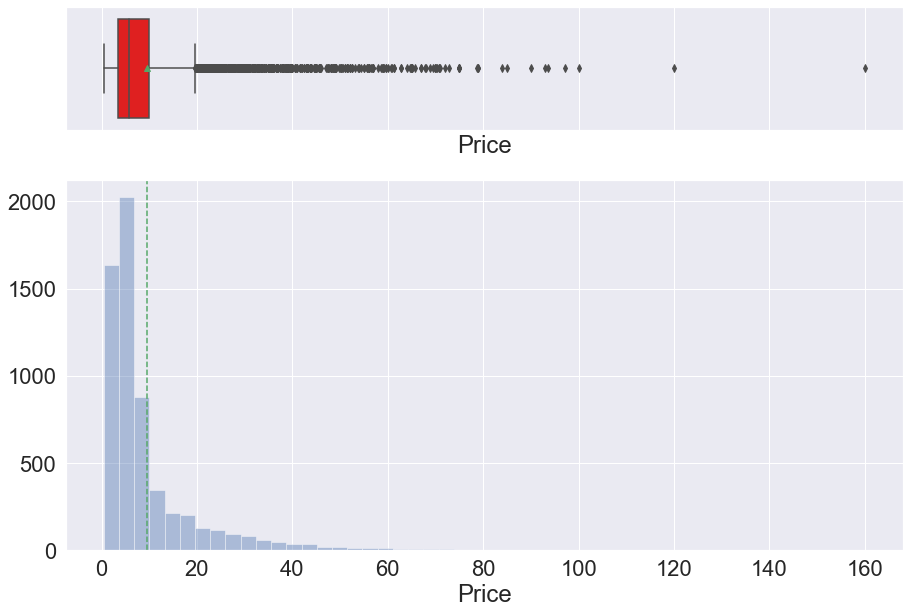

In [41]:
histogram_boxplot(df.Price)

**Observation**

- Price is right skewed distributed which means a big concentration of cars below mean 10 Lakh.

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


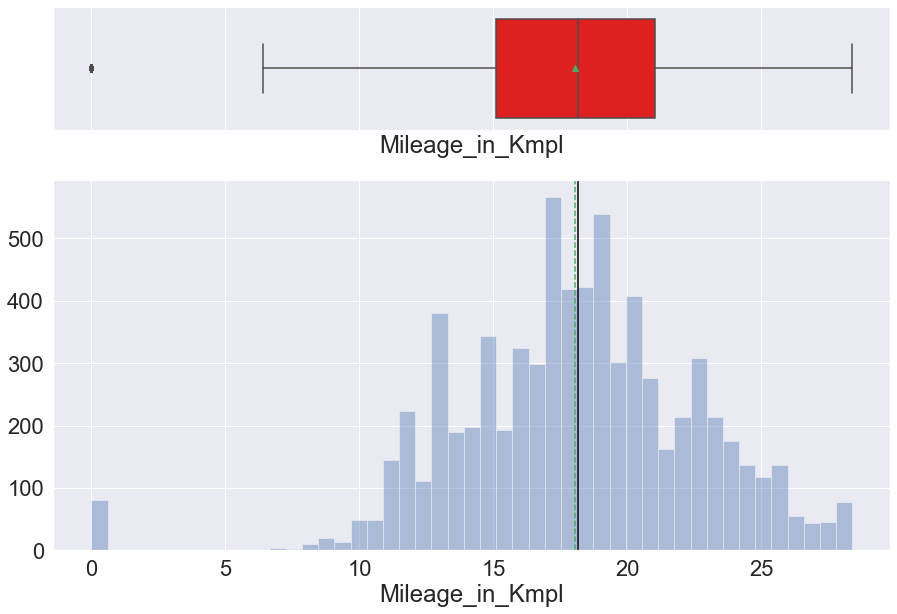

In [42]:
histogram_boxplot(df.Mileage_in_Kmpl)

**Observation**

- Mileage is normally distributed but it can be observed that there are Outliers on the lower scale

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


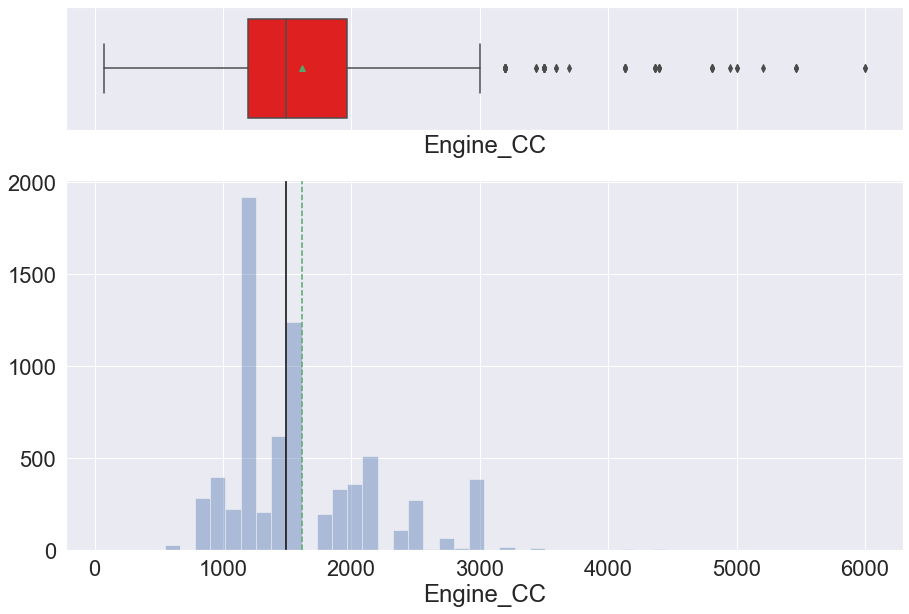

In [43]:
histogram_boxplot(df.Engine_CC)

**Observation**

- Engine CC can be observed that could be divided in categories since it behaves as such. For instance, from 800 to 1500, from 1500 to 2300 and so one.

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


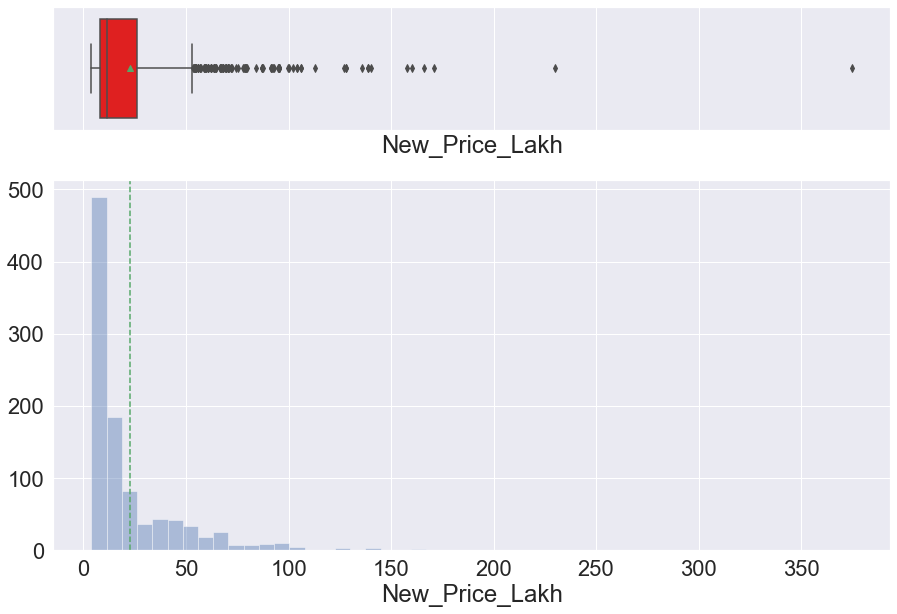

In [44]:
histogram_boxplot(df.New_Price_Lakh)

**Observation**

- Price is right skewed distributed with a big concentration of cars price (new_vehicle) below mean 18 Lakh.

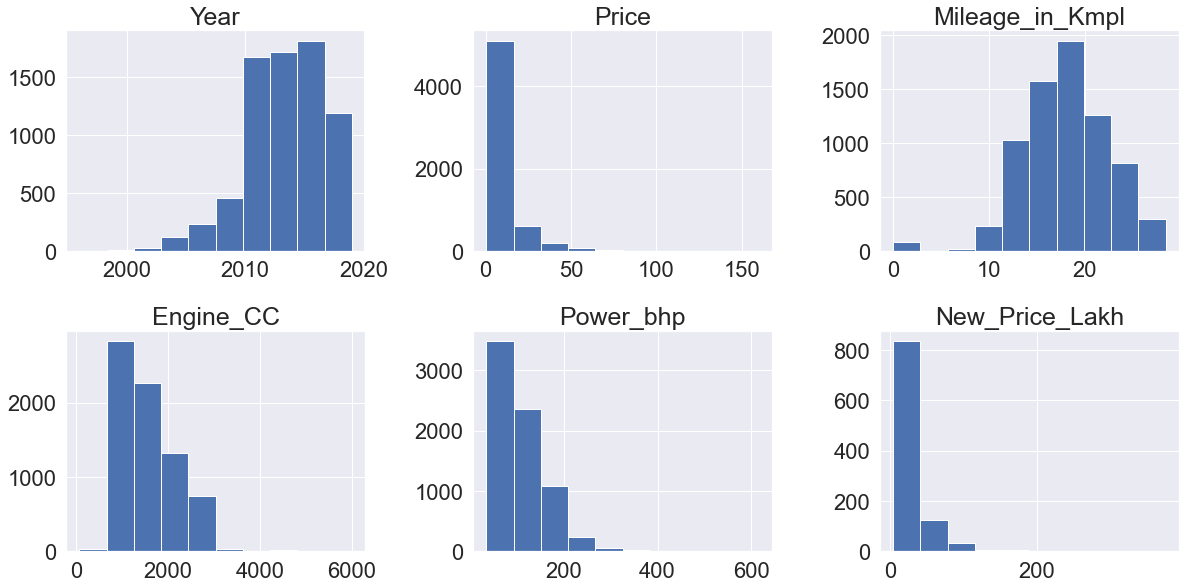

In [45]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Kilometers_Driven')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

**Observation**
* Milieage is somewhat normal distributed with fewer outliers on the lower scale.
* Year are left skewed showing most cars are up to 10y old.
* Price, Engine CC and Power are right skewed distributed showing most cars are laying in the lower scale of the range or in other words lower than 2000 CC or below 200 bhp .

In [46]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 20) # annotate the percantage

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marce\anaconda3\lib\si

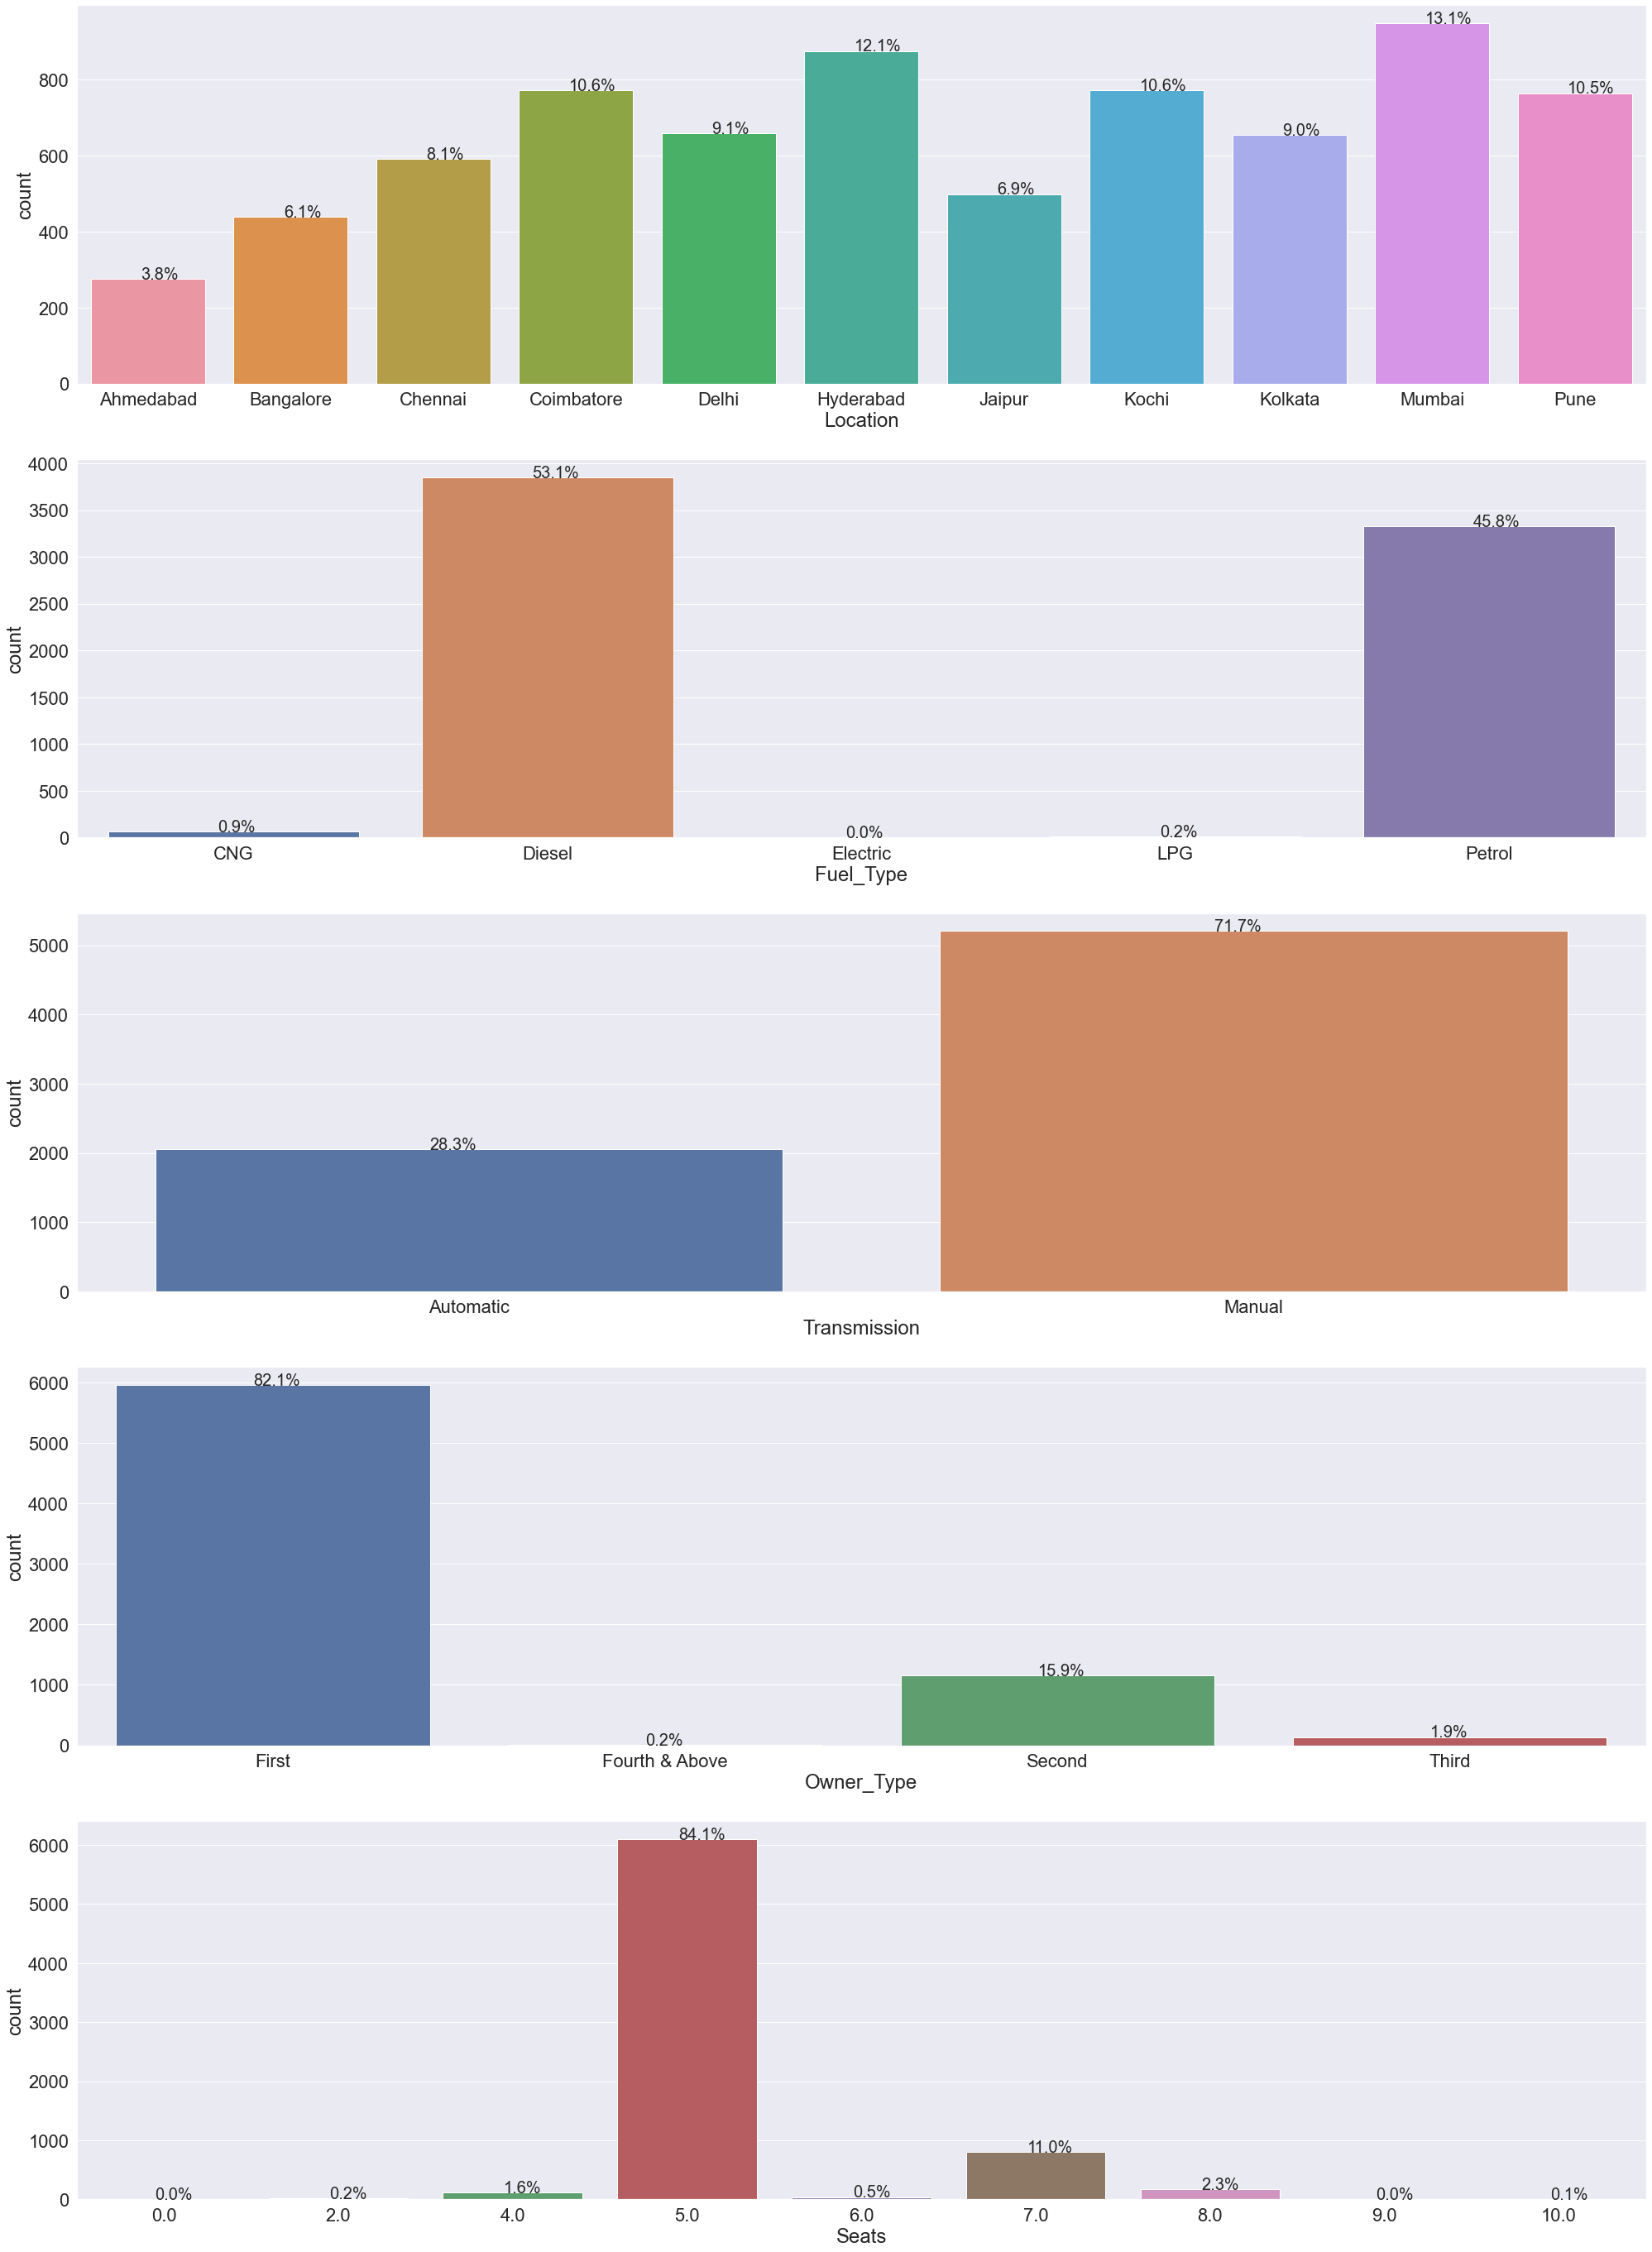

In [47]:
all_cat = df.select_dtypes(include='category').columns.tolist()
all_cat.remove('Brand')
plt.figure(figsize=(34,180))

for i in range(len(all_cat)):
    plt.subplot(18,1,i+1)
    ax = sns.countplot(df[all_cat[i]])
    bar_perc(ax,df[all_cat[i]])
    #sns.displot(df[all_col[i]], kde=True)
    #plt.tight_layout()
    #plt.title(all_cat[i],fontsize=25)
plt.show()


**Observation**
* Top sales location: Mumbai, Hyderabad, Coimbatore
* Diesel and Petrol represent 98.9% of the cars
* Transmission Manual representing 71.7% of cars.
* 82.1% of the cars were first owners.
* 83.4% Most cars are passenger cars compact to median size (5 seats)

### 3.2 Bivariate analysis

In [48]:
#Checking correlation of each variable to see which are strongly correlated (explanatory power) regarding target variable 
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = df[numeric_columns].corr()
df.corr()['Price']

Year                 0.305327
Kilometers_Driven   -0.011493
Price                1.000000
Mileage_in_Kmpl     -0.300620
Engine_CC            0.657347
Power_bhp            0.770052
New_Price_Lakh       0.871847
Name: Price, dtype: float64

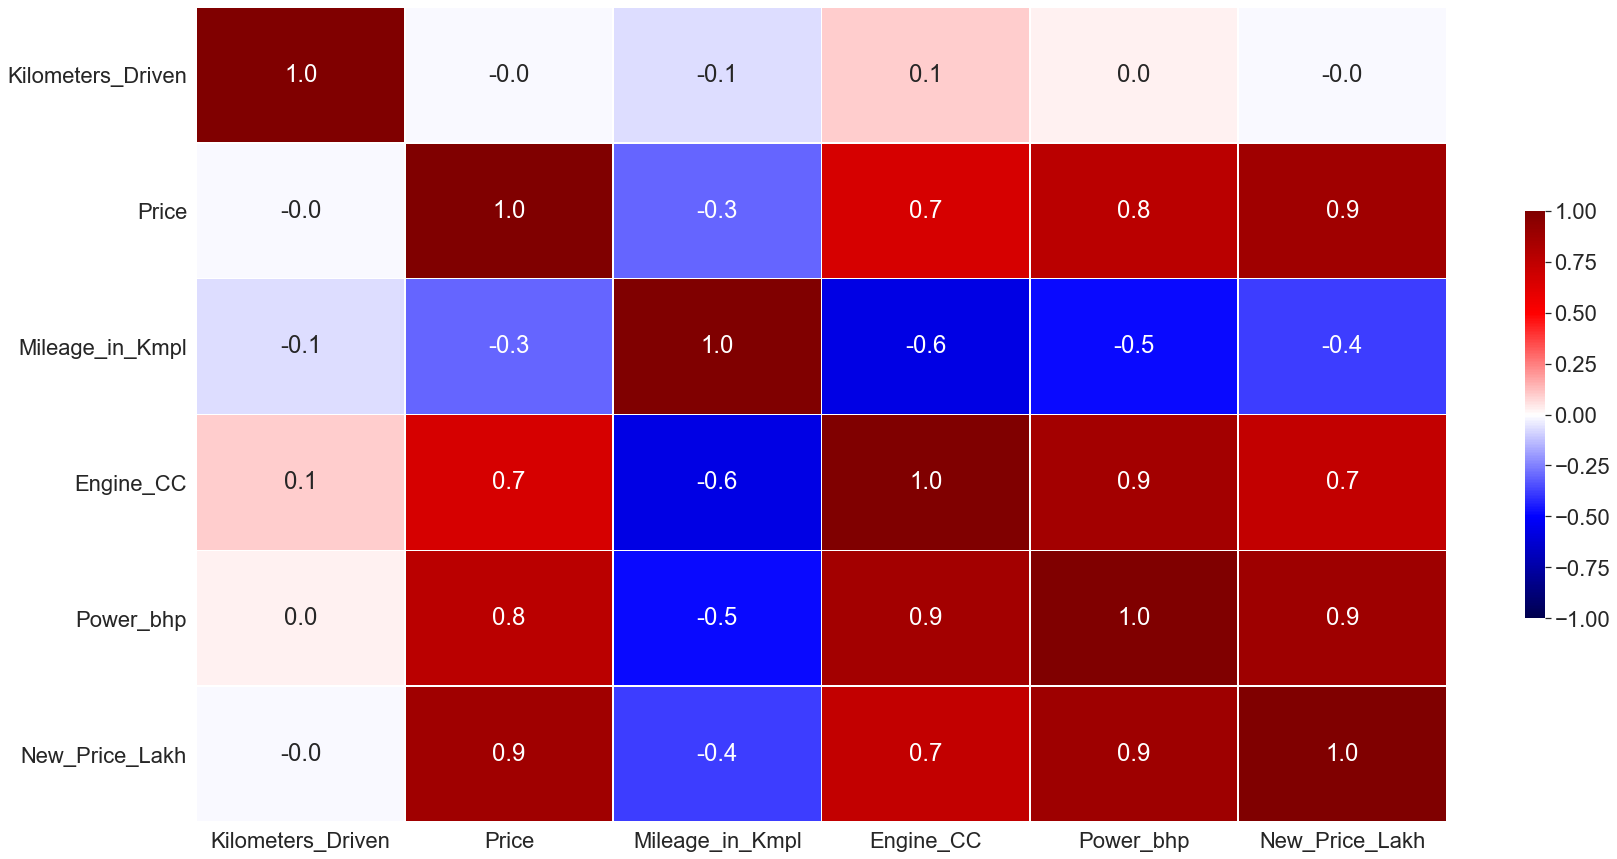

In [49]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observation**
* Positive correlation were found in Variable Price with Engine_CC, Power_bhp, and New_price_Lakh meaning that when Price goes up those variables follow the same behavior.
* Negative correlation were found in Variable Miles_in_Kmpl (Fuel economy) with Engine_CC, Power_bhp, New_price and Price meaning when this variable increase (in other words, you have a more economic car) makes others variables decrease which makes a lot of sense, a more economic car would be a car with a smaler engine (CC), Power and so on.

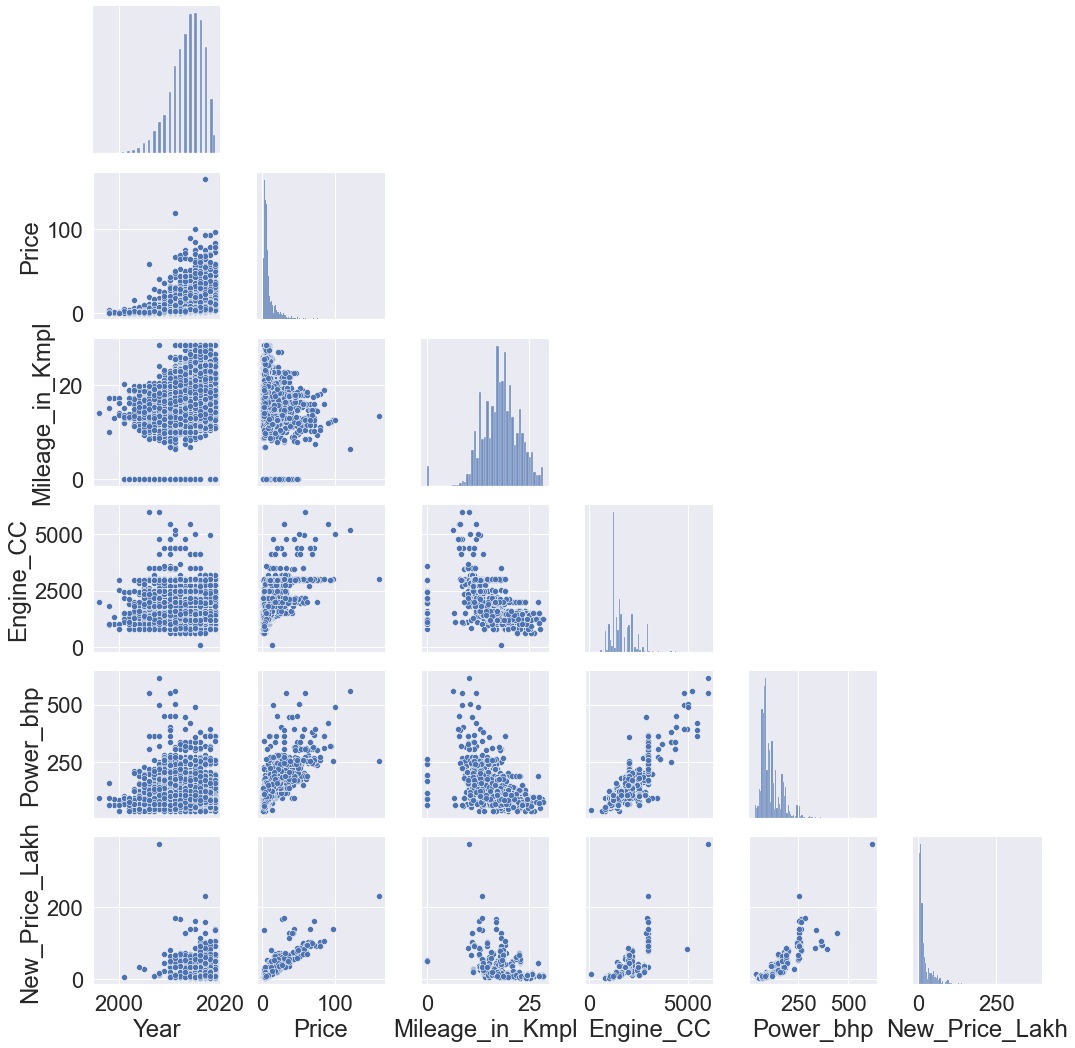

In [50]:
sns.pairplot(data=df.drop(['Name','Location','Fuel_Type','Transmission',
                           'Owner_Type','Seats','Kilometers_Driven'],axis=1), corner=True)

Observation: Variables Price, Power, Engine present linear behavior and multi-variate analisys should be done.

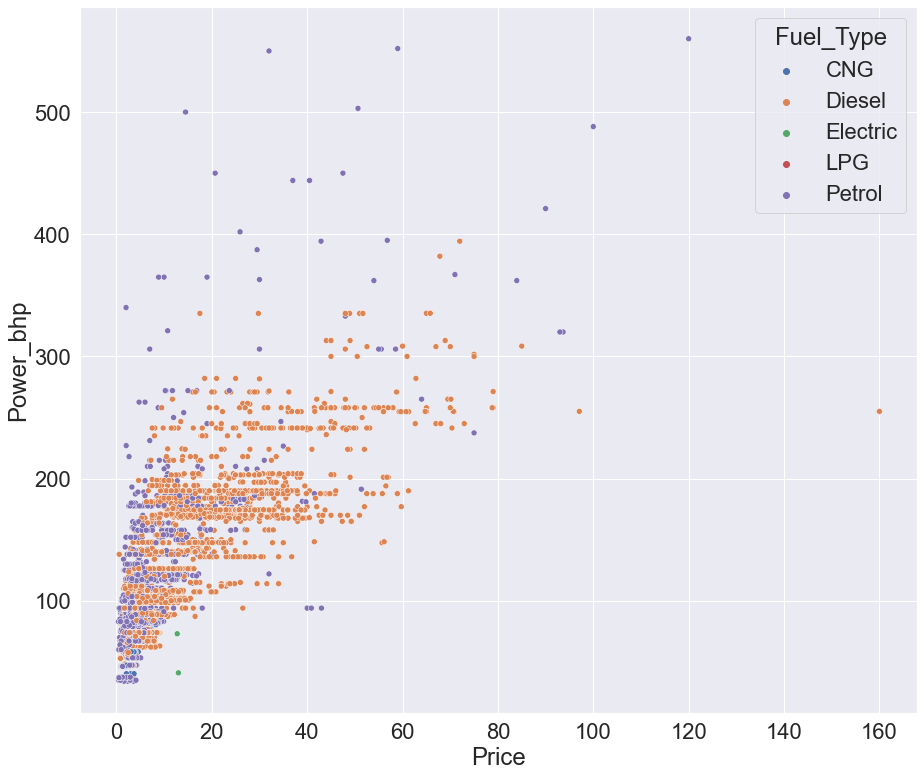

In [51]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Power_bhp', x='Price', hue='Fuel_Type', data=df);

**Observation**
* It can be observed that cars that use Diesel and Petrol do have almost same Power up to 400 bhp, after that Petrol becomes the only choice for customers who are looking for cars with 400 bhp or higher.
* Below 80 bhp most expensive cars are eletric powered.
* It can be observed that most of Diesel cars are more expensive than others vehicles with different fuel type.

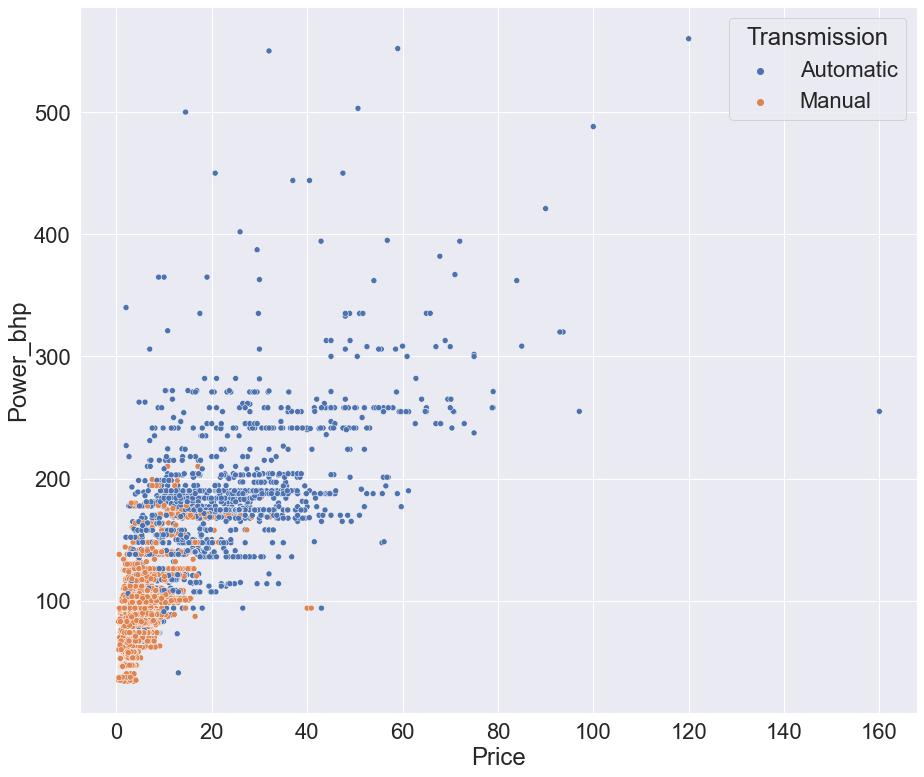

In [52]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Power_bhp', x='Price', hue='Transmission', data=df);

**Observation**
* It can be observed that cars with automatic transmission are more expensive than manual ones and are found only in most cases above 80bhp.
* An intersting factor is that cars above 220 bhp are almost not found with manual tranmission.


C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


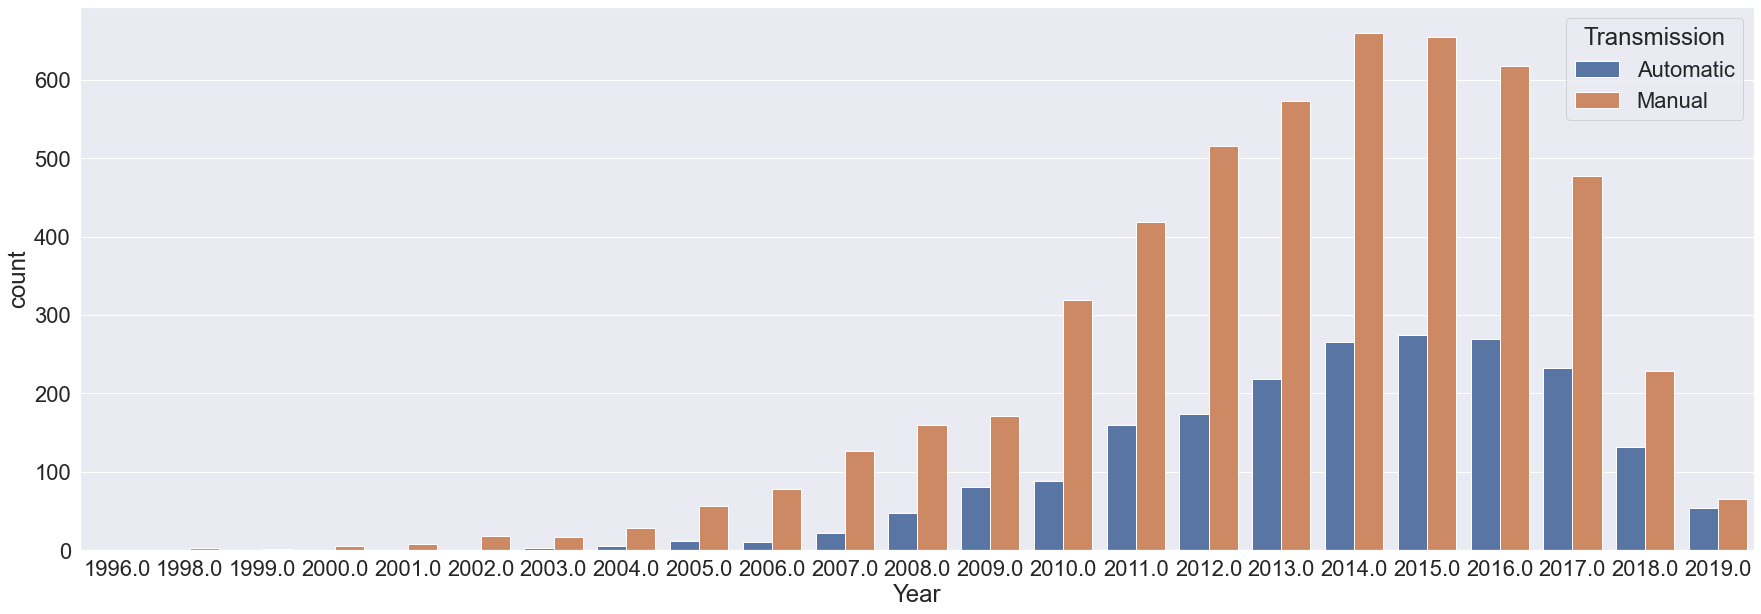

In [53]:
plt.figure(figsize=(30,10))
sns.countplot(df['Year'] , hue=df['Transmission']);

**Observation**
* It can be observed that the gap between cars with manual transmission to automatic one has being reduced from 2017 on which may indicate a trend towards automatic transmission.
* It can also be observed that most of cars in the market are between 2011 - 2017 (manufacturer year). In other words in case this data was extracted in 2021, cars on the market are 4 to 10 years old. 

### Outliers Treatment

In [54]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [55]:
#Defining variables to be called in the next lines of codes
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

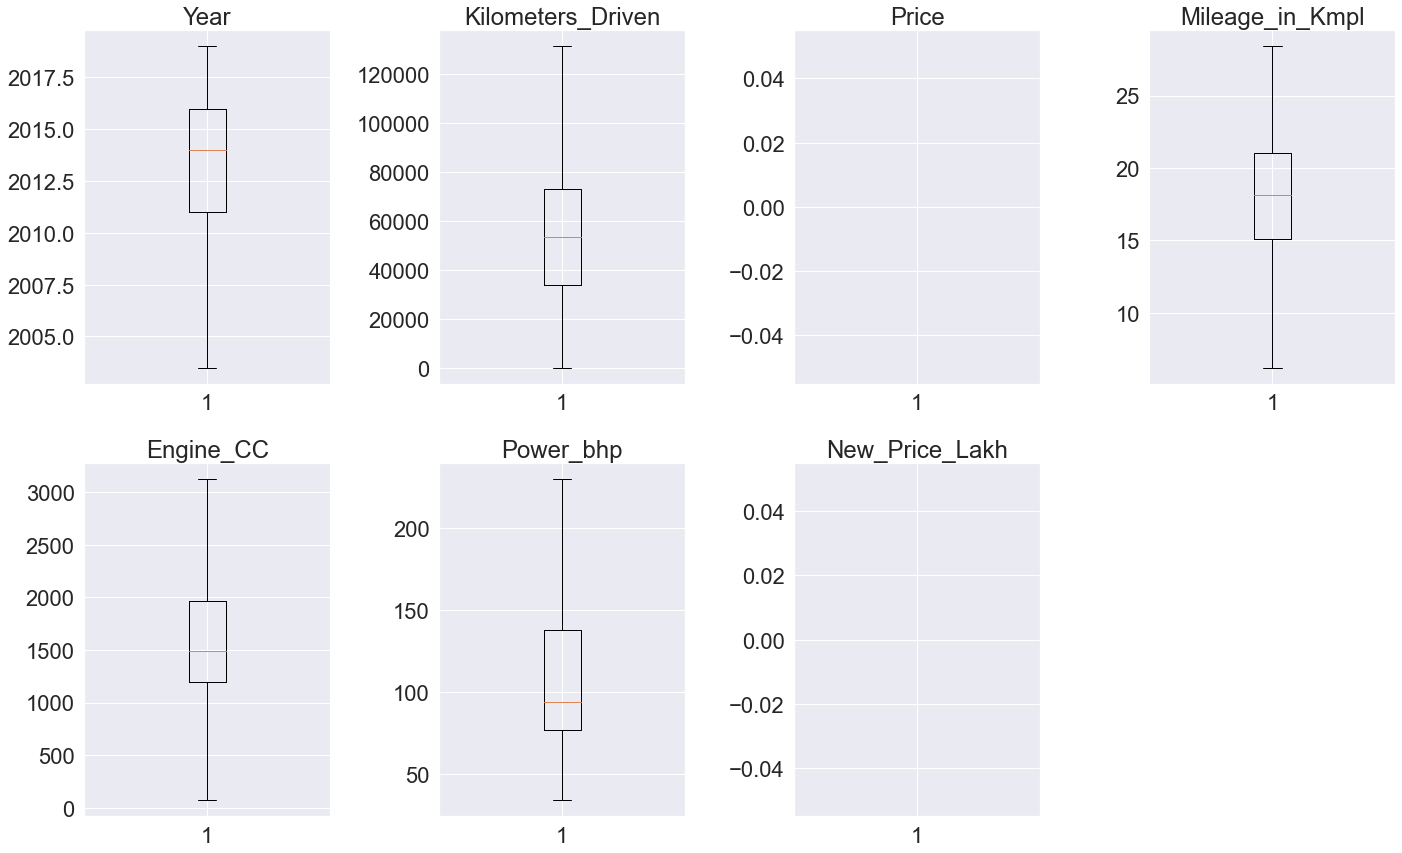

In [56]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Create Dummy Variables for all categorical variables

In [57]:
#Create dummys for all categorical variables - preparation
categorical_cols = df.select_dtypes(include='category').columns.tolist()
categorical_cols.remove('Brand')
categorical_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

In [58]:
#Create dummys for all categorical variables
df = pd.get_dummies(df, columns = categorical_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Name                       7253 non-null   string  
 1   Year                       7253 non-null   float64 
 2   Kilometers_Driven          7253 non-null   float64 
 3   Price                      6019 non-null   float64 
 4   Mileage_in_Kmpl            7253 non-null   float64 
 5   Engine_CC                  7253 non-null   float64 
 6   Power_bhp                  7253 non-null   float64 
 7   New_Price_Lakh             1006 non-null   float64 
 8   Brand                      7253 non-null   category
 9   Location_Ahmedabad         7253 non-null   uint8   
 10  Location_Bangalore         7253 non-null   uint8   
 11  Location_Chennai           7253 non-null   uint8   
 12  Location_Coimbatore        7253 non-null   uint8   
 13  Location_Delhi             7253 n

### Model, Train and Evaluate

In [59]:
#Defining X and y variables
#Creating variable X based on existent data from variable 'Price', excluding rows with missing values
#since Regression myodel will be used to predict 'Price' missing values
df_temp = df.dropna(subset=['Price'])
y = df_temp[['Price']]
X = df_temp.drop(['Price','New_Price_Lakh','Brand','Name','Location_Pune','Fuel_Type_Electric','Owner_Type_Fourth & Above','Seats_10.0'], axis=1)

Observations:
* It was created a variable call df_temp where it was stored only the existent values from variable 'Price' excluding null values. This df_temp was then used as a baseline for y axis of linear regression.
* One variable from each dummy Was removed.

In [60]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
regression_model1 = LinearRegression()                                    
regression_model1.fit(X_train, y_train)                                  

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = regression_model1.predict(X_test)
np.shape(pred)

(1806, 1)

In [62]:
#Get coefficients per columns
all_col = df_temp.select_dtypes(include=np.number).columns.tolist()
for idx, all_col in enumerate (X_train.columns):
    print ('The coefficient for {} is {}'.format(all_col, regression_model1.coef_[0][idx]))

The coefficient for Year is 0.5325796861911078
The coefficient for Kilometers_Driven is -1.967153930721898e-05
The coefficient for Mileage_in_Kmpl is -0.15874006563559284
The coefficient for Engine_CC is 0.0005780079872997222
The coefficient for Power_bhp is 0.06183869936473632
The coefficient for Location_Ahmedabad is 0.1123196825265508
The coefficient for Location_Bangalore is 0.7948201233143842
The coefficient for Location_Chennai is 0.11024123593697074
The coefficient for Location_Coimbatore is 0.6196319284304794
The coefficient for Location_Delhi is -0.4258166200476922
The coefficient for Location_Hyderabad is 0.7088765406748925
The coefficient for Location_Jaipur is 0.13952531735837476
The coefficient for Location_Kochi is -0.06668437701813253
The coefficient for Location_Kolkata is -1.3123759238756294
The coefficient for Location_Mumbai is -0.3796864480475834
The coefficient for Fuel_Type_CNG is -7.829064533890097
The coefficient for Fuel_Type_Diesel is -6.124659471957258
The co

Observation:
* If (coefficient  > 0), then x(predictor) and y(target) have a positive relationship. That is any increase in x will increase y.
* If (coefficient < 0), then x(predictor) and y(target) have a negative relationship. That is any increase in x will decrease y.

In [63]:
intercept = regression_model1.intercept_[0]
print("The intercept for our model is  {}".format(intercept))

The intercept for our model is  -1060.990318616212


The score (R^2) for In-sample and out of sample

In [64]:
regression_model1.score(X_train, y_train)

0.8431514468488424

**Observation:**
84.31% of all the variance in the training data is explained by this regression_model1


In [65]:
regression_model1.score(X_test, y_test)

0.8378167588512113

**Observation:** 83.78% of the variance in the testing data is explained by this regression_model1
* By comparing R^2 of training data to R^2 of the testing data we have a delta of 0.005334 representing a 0.5% difference meaning that the model does not show sings of overfitting the trainning data that would terribly perform in the testing data.


In [66]:
a = regression_model1.score(X, y), 1 - (1-regression_model1.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
f"The R^2 is {a[0]} and the Adjusted R^2 is {a[1]}."

'The R^2 is 0.8415208058427782 and the Adjusted R^2 is 0.8406736066758836.'

In [67]:
# Mean Absolute Error
mean_absolute_error(y_test, pred)

1.7245645812758739

In [68]:
#RMSE
mean_squared_error(y_test, pred)**0.5

2.3454842451221123

### Conclusion

* The training and testing scores are around 84% and both scores are comparable, hence the model is a good fit.
*R2_score is 83.7% meaning that it explains 84% of the total variation in the dataset. So, overall the model is very satisfactory.
* RMSE without OLS is 2.3454 (this data will be compared in a later stage)

#### Applying OLS for further model improvements

In [69]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     725.0
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:17:25   Log-Likelihood:                -9442.0
No. Observations:                4213   AIC:                         1.895e+04
Df Residuals:                    4181   BIC:                         1.915e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -707

### Multicolliniarity 

In [70]:
#Checking for Multicolliniarity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

C:\Users\marce\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\marce\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Series before feature selection: 

const                       0.000000
Year                        2.166722
Kilometers_Driven           1.908024
Mileage_in_Kmpl             3.140720
Engine_CC                   8.114596
Power_bhp                   6.257340
Location_Ahmedabad          1.331336
Location_Bangalore          1.519102
Location_Chennai            1.663274
Location_Coimbatore         1.951820
Location_Delhi              1.758516
Location_Hyderabad          1.992156
Location_Jaipur             1.565804
Location_Kochi              1.972207
Location_Kolkata            1.838811
Location_Mumbai             2.089391
Fuel_Type_CNG              28.881866
Fuel_Type_Diesel          755.963637
Fuel_Type_LPG               6.037153
Fuel_Type_Petrol          751.104341
Transmission_Automatic           inf
Transmission_Manual              inf
Owner_Type_First          100.717158
Owner_Type_Second          91.777381
Owner_Type_Third           13.352811
Seats_0.0                   1.209591
Sea

In [71]:
# it was dropped colomuns with 3-dig VIF (highest) and check the Adjusted-R Squared. It was done ONE by ONE (dropping 
#columns) but it was kept only the code with the columns to drop that had most impact to be dropped.
X_train2 = X_train1.drop(['Fuel_Type_Diesel','Transmission_Manual','Owner_Type_First','Seats_5.0'],axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                     854139.312751
Year                           2.143032
Kilometers_Driven              1.884508
Mileage_in_Kmpl                3.257682
Engine_CC                      8.353138
Power_bhp                      6.172753
Location_Ahmedabad             1.316980
Location_Bangalore             1.536582
Location_Chennai               1.642347
Location_Coimbatore            1.934789
Location_Delhi                 1.756244
Location_Hyderabad             1.980677
Location_Jaipur                1.548342
Location_Kochi                 1.957035
Location_Kolkata               1.824013
Location_Mumbai                2.062461
Fuel_Type_CNG                  1.094537
Fuel_Type_LPG                  1.077135
Fuel_Type_Petrol               2.322456
Transmission_Automatic         2.031880
Owner_Type_Second              1.167362
Owner_Type_Third               1.110974
Seats_0.0                      1.021688
Seats_2.0                      1.037621
Seats

In [72]:
#Running OLS again to compare results after dorpping columns
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     801.5
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:17:25   Log-Likelihood:                -9446.0
No. Observations:                4213   AIC:                         1.895e+04
Df Residuals:                    4184   BIC:                         1.913e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1070

Observations:
* Although R^2 square was not affected, P-value was somehow affected and then this olsres1 model will be taken as the best one to move forward.
* P-values check, The highest p value found among all variables with p value greater than 0.05 are from  categorical variables (E.g Location, Seats, Owner)and as there are other levels of this category that are significant those variables will not be removed


### Checking the rest of assumptions on the model - olsres1

##### Mean of Residuals

In [73]:
residual = olsres1.resid
np.mean(residual)

5.408464983198968e-12

* Mean of residuals is very close to 0 which 0 is the goal.

##### Test for linearity

In [74]:
residual=olsres1.resid
fitted=olsres1.fittedvalues #predicted values

C:\Users\marce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


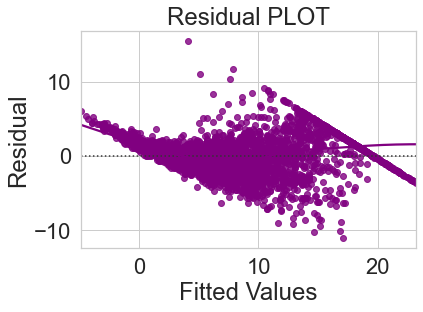

In [75]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

* This plot did not present any strong pattern.

#### Test for Normality

C:\Users\marce\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


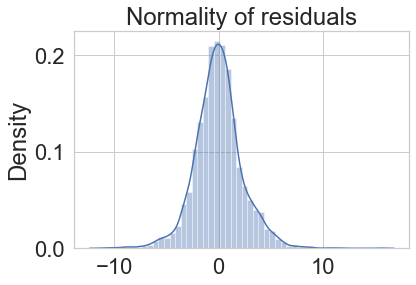

In [76]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

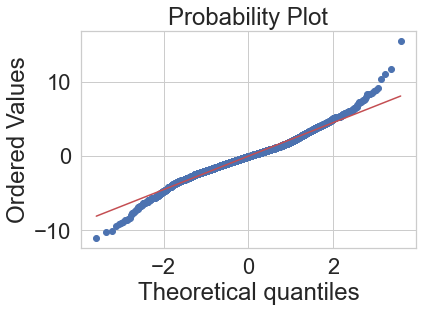

In [77]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

* This behavior usually means that the data have more extreme values than expected

In [78]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9788698554039001, pvalue=1.441672985182958e-24)

* Shapiro test is not recommended for dataset Bigger than 2000 entries so that results will not be taken in consideration.

#### Test for Homoscedascity

* Null Hypothesis: Residuals are homoscedastic
* Alternate Hypothesys: Residuals have hetroscedascity

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train2)
lzip(name, test)


[('F statistic', 1.0608999613185297), ('p-value', 0.08893620102201062)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

#### Prediction part

In [80]:
X_train2.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage_in_Kmpl', 'Engine_CC',
       'Power_bhp', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Fuel_Type_CNG', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_Type_Second',
       'Owner_Type_Third', 'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0'],
      dtype='object')

In [81]:
X_test_final = X_test[X_train2.columns]

In [82]:
X_test.value_counts().sum()

1806

In [83]:
X_test_final.head(3)

,const,Year,Kilometers_Driven,Mileage_in_Kmpl,Engine_CC,Power_bhp,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2868,1.0,2013.0,69000.0,23.4,1248.0,74.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5924,1.0,2017.0,26741.0,15.4,1997.0,120.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3764,1.0,2014.0,86000.0,15.1,2179.0,140.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [84]:
y_pred = olsres1.predict(X_test_final)

#### Checking the performance on train and test: metric used - RMSE

In [85]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 2.2776887724697095
Test error: 2.349499569608748


* Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
* Hence we can conclude the model "olsres1" is good for prediction as well as inference purpose


#### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
#### Hence we can conclude the model "olsres1" is good for prediction as well as inference purpose


In [86]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     801.5
Date:                Fri, 26 Feb 2021   Prob (F-statistic):               0.00
Time:                        14:17:28   Log-Likelihood:                -9446.0
No. Observations:                4213   AIC:                         1.895e+04
Df Residuals:                    4184   BIC:                         1.913e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1070

### Conclusion

* Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
* Hence we can conclude the model "olsres1" is good for prediction as well as inference purpose


### The next lines of code will be a second project, by using the predicted linear regression model (regression_model1), it will be imputed all missing values for variable 'Price'.

In [87]:
#Creating X variable containing the whole data
X2 = df.drop(['Price','New_Price_Lakh','Brand','Name','Location_Pune','Fuel_Type_Electric','Owner_Type_Fourth & Above','Seats_10.0'], axis=1)
X2.shape

(7253, 32)

In [88]:
#Passing my model1 from line 66 thru the whole data. Innitially the model was created removing NAN
pred2 = regression_model1.predict(X2) 
df['Predicted_Price'] = pd.DataFrame(data=pred2, columns=['Predicted_Price'])

In [89]:
df.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Price', 'Mileage_in_Kmpl',
       'Engine_CC', 'Power_bhp', 'New_Price_Lakh', 'Brand',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Predicted_Price'],
      dtype='object')

In [90]:
#creating copy from original dataframe
df2 = df.copy()
df2.head(3)

,Name,Year,Kilometers_Driven,Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Predicted_Price
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,2010.0,72000.0,1.75,18.9924,998.0,58.16,NaN,Maruti,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0.239404
1,Hyundai Creta 1.6 CRDi SX Option,2015.0,41000.0,12.50,19.6700,1582.0,126.20,NaN,Hyundai,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,10.033711
2,Honda Jazz V,2011.0,46000.0,4.50,18.2000,1199.0,88.70,8.61,Honda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,3.211596


In [91]:
#reordering Dataframe
df2.columns


Index(['Name', 'Year', 'Kilometers_Driven', 'Price', 'Mileage_in_Kmpl',
       'Engine_CC', 'Power_bhp', 'New_Price_Lakh', 'Brand',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Predicted_Price'],
      dtype='object')

In [92]:
#reordering Dataframe
df2 = df2[['Name', 'Year', 'Kilometers_Driven', 'Price','Predicted_Price', 'Mileage_in_Kmpl',
       'Engine_CC', 'Power_bhp', 'New_Price_Lakh', 'Brand',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0']]

In [93]:
#Bring the whole DF where variable Price has Null Values
df3 = df2[df2['Price'].isnull()]
df3.head(3)

,Name,Year,Kilometers_Driven,Price,Predicted_Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6019,Maruti Alto K10 LXI CNG,2014.0,40929.0,NaN,3.464590,23.03364,998.0,58.2,NaN,Maruti,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
6020,Maruti Alto 800 2016-2019 LXI,2013.0,54493.0,NaN,0.599043,24.70000,796.0,47.3,NaN,Maruti,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
6021,Toyota Innova Crysta Touring Sport 2.4 MT,2017.0,34000.0,NaN,13.612509,13.68000,2393.0,147.8,25.27,Toyota,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
#Changing columns name for further need
df3 = df3[['Predicted_Price']]
df3.columns =['Price']
df3.head(3)

,Price
S.No.,
6019,3.464590
6020,0.599043
6021,13.612509


In [95]:
#Updating df2 based on df3, this function with Overwrite, False, will compare column names
#and update info from df3 into df2 only where df2 is null. 
df2.update(df3, overwrite=False)

In [96]:
#Checking if still there are null values on variable 'Price'
df2[df2['Price'].isnull()]

,Name,Year,Kilometers_Driven,Price,Predicted_Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Model, Train and Evaluate

In [97]:
#Defining X and y variables
#Creating variable X based on existent data from variable 'Price' in other to fill out missing values in variable 'Price'
y4 = df2[['Price']]
X4 = df2.drop(['Price','Predicted_Price','New_Price_Lakh','Brand','Name','Location_Pune','Fuel_Type_Electric','Owner_Type_Fourth & Above','Seats_10.0'], axis=1)
shapeX4= X4.shape
shapey4= y4.shape 
f"shape of X4 {shapeX4} and the shape of y4 is {shapey4}."

'shape of X4 (7253, 32) and the shape of y4 is (7253, 1).'

In [116]:
X4.columns

Index(['Year', 'Kilometers_Driven', 'Mileage_in_Kmpl', 'Engine_CC',
       'Power_bhp', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Second', 'Owner_Type_Third', 'Seats_0.0', 'Seats_2.0',
       'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0', 'Seats_8.0',
       'Seats_9.0'],
      dtype='object')

In [98]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=0)

In [99]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
regression_model2 = LinearRegression()                                    
regression_model2.fit(X_train4, y_train4)                                  

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred4 = regression_model2.predict(X_test4)

In [100]:
#Get coefficients per columns
all_col = df2.select_dtypes(include=np.number).columns.tolist()
for idx, all_col in enumerate (X_train4.columns):
    print ('The coefficient for {} is {}'.format(all_col, regression_model2.coef_[0][idx]))

The coefficient for Year is 0.5410357417544732
The coefficient for Kilometers_Driven is -1.821233693345391e-05
The coefficient for Mileage_in_Kmpl is -0.13614378163443394
The coefficient for Engine_CC is 0.0006752113951750029
The coefficient for Power_bhp is 0.06300409147846932
The coefficient for Location_Ahmedabad is 0.2802193065404934
The coefficient for Location_Bangalore is 0.9273707452861353
The coefficient for Location_Chennai is 0.2962699168513184
The coefficient for Location_Coimbatore is 0.7722615432638876
The coefficient for Location_Delhi is -0.34756937654488085
The coefficient for Location_Hyderabad is 0.8812769280119008
The coefficient for Location_Jaipur is 0.19952986354420593
The coefficient for Location_Kochi is -0.05348805134845975
The coefficient for Location_Kolkata is -1.3099282218810768
The coefficient for Location_Mumbai is -0.43745361709219704
The coefficient for Fuel_Type_CNG is -7.618405838449319
The coefficient for Fuel_Type_Diesel is -6.276178528711092
The c

In [101]:
intercept = regression_model2.intercept_[0]
print("The intercept for our model is  {}".format(intercept))

The intercept for our model is  -1078.4795533374154


In [102]:
regression_model2.score(X_train4, y_train4)

0.864660776046912

In [103]:
regression_model2.score(X_test4, y_test4)

0.8611480833165137

**Observation:** 
* 86.46% of the variance in the testing data is explained by this regression_model2 which outperformed previous model1.
* By comparing R^2 of training data to R^2 of the testing data we have a delta of 0.00351 representing a 0.3% difference meaning that the model does not show sings of overfitting the trainning data that would terribly perform in the testing data.

In [104]:
a = regression_model2.score(X4, y4), 1 - (1-regression_model2.score(X4, y4))*(len(y)-1)/(len(y)-X4.shape[1]-1)
f"The R^2 is {a[0]} and the Adjusted R^2 is {a[1]}."

'The R^2 is 0.863636488967298 and the Adjusted R^2 is 0.8629075159714668.'

In [105]:
# Mean Absolute Error
mean_absolute_error(y_test4, pred4)

1.4108860411671607

Observation:
* model 2 showed a slightely reduction on the mean absolute error, where this metric can be interpreted as low as better.

In [106]:
#RMSE
mean_squared_error(y_test4, pred4)**0.5

2.095985732601308

Observation:
* model 2 showed a slightely reduction on the mean squared error, where this metric can be interpreted as low as better.

### Overall Conclusion about regression models
* No further improvement will be pursued since improvements vs time consuming resulted in a satisfactory model.

### Model validation by using column 'New Price' as threashold / comparison

In [107]:
#Creating this DF for further validation
df_val = df2
df_val.head()

,Name,Year,Kilometers_Driven,Price,Predicted_Price,Mileage_in_Kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,2010.0,72000.0,1.75,0.239404,18.9924,998.0,58.16,NaN,Maruti,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015.0,41000.0,12.50,10.033711,19.6700,1582.0,126.20,NaN,Hyundai,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,Honda Jazz V,2011.0,46000.0,4.50,3.211596,18.2000,1199.0,88.70,8.61,Honda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Maruti Ertiga VDI,2012.0,87000.0,6.00,4.958704,20.7700,1248.0,88.76,NaN,Maruti,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013.0,40670.0,17.74,13.511053,15.2000,1968.0,140.80,NaN,Audi,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [110]:
#creating a copy of df and reordering it
df_temp1 = df_val.dropna(subset=['New_Price_Lakh'])
df.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Price', 'Mileage_in_Kmpl',
       'Engine_CC', 'Power_bhp', 'New_Price_Lakh', 'Brand',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0', 'Predicted_Price'],
      dtype='object')

In [111]:
#Subtracting values 'new price' - 'predicted values' and including it in variable 'incorrect prediction'
#negative values are incorrect
df_temp1['Incorrect_Predction'] = df_temp1['New_Price_Lakh'].subtract(df_temp1['Predicted_Price'])

<ipython-input-111-c815cdb01a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['Incorrect_Predction'] = df_temp1['New_Price_Lakh'].subtract(df_temp1['Predicted_Price'])


In [112]:
#reordering Dataframe
df_temp1 = df_temp1[['Name', 'Price', 'Predicted_Price','New_Price_Lakh','Incorrect_Predction','Year', 'Kilometers_Driven',
       'Mileage_in_Kmpl', 'Engine_CC', 'Power_bhp', 'Brand',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Owner_Type_First',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Seats_0.0', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0']]

In [113]:
#Subtracting values 'new price' - 'predicted values' and including it in variable 'incorrect prediction'
#negative values are incorrect
df_temp2 = df_temp1[df_temp1['Incorrect_Predction']<0].loc[:,['Incorrect_Predction']]
df_temp2.value_counts().sum()
df_temp2

,Incorrect_Predction
S.No.,
111,-1.462287
880,-0.956772
1001,-0.079093
1110,-0.389841
1198,-1.161227
1324,-1.629960
1363,-1.058150
1368,-0.621949
1393,-2.230875


In [115]:
#Showing more info about the row
df_temp1.loc[111:111]

,Name,Price,Predicted_Price,New_Price_Lakh,Incorrect_Predction,Year,Kilometers_Driven,Mileage_in_Kmpl,Engine_CC,Power_bhp,Brand,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_0.0,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
111,Maruti Eeco 5 Seater AC,3.91,6.592287,5.13,-1.462287,2017.0,38053.0,15.1,1196.0,73.0,Maruti,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


### Conclusion
### It was found 73 entries where the predicted values for a used car surpessed the value of a 'New Car'. It is in fact a error from the prediction but can be understood since variable 'New_car' was not used to create the model. At this point I will ask for advise from mentoring section to know which would be the better way to hand such situation since I could not find reasoable the inclusion of 6427 missing values by using prediction models and I prefered not used this data at all.